<a href="https://colab.research.google.com/github/srijamannam/Teleco_customer_churn/blob/main/Teleco_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Modules** 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')

# **Reading Data** 

In [ ]:
df=pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop(["customerID"],axis=1,inplace=True)

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#Since Total Charges data type is object , we are changing it to Numerical datatype 

df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
df[df['TotalCharges'].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape


(7032, 20)

# **EDA**

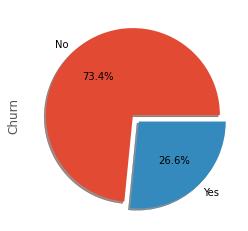

In [ ]:
df["Churn"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,explode=(0,0.1))


# **Visualizing Categorical Variables** 

In [ ]:
def data_visual_column(column):
    #d= pd.DataFrame(df.groupby(column).mean()['Churn']).reset_index()
    fig , ax = plt.subplots(1,2, figsize=(20,5))

    ax[0].pie(df[column].value_counts(), labels = df[column].unique(), autopct='%.00f%%')

    sns.countplot(ax= ax[1], data = df, x= column, hue='Churn')
    ax[1].set_xticklabels(rotation = 30)

    #sns.barplot(ax= ax[2],data = df, x= column, y= 'Churn')
    #ax[2].set_xticklabels(rotation = 30)

    fig.suptitle(f'Exploring using Visualization on "{column}"')
    

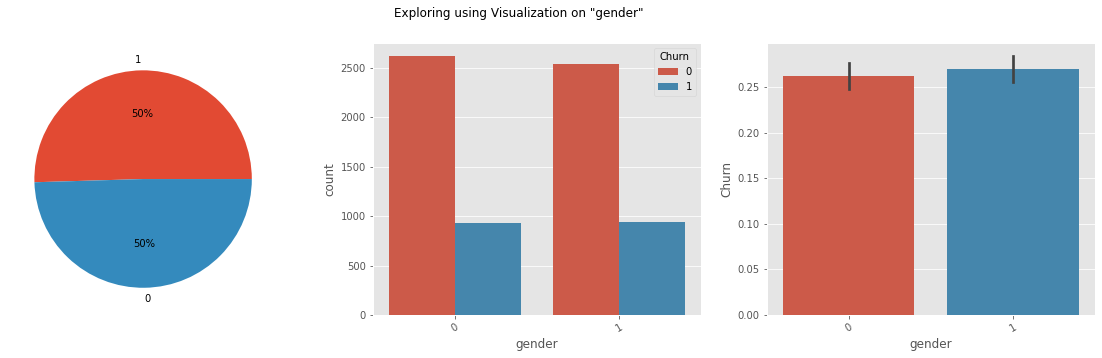

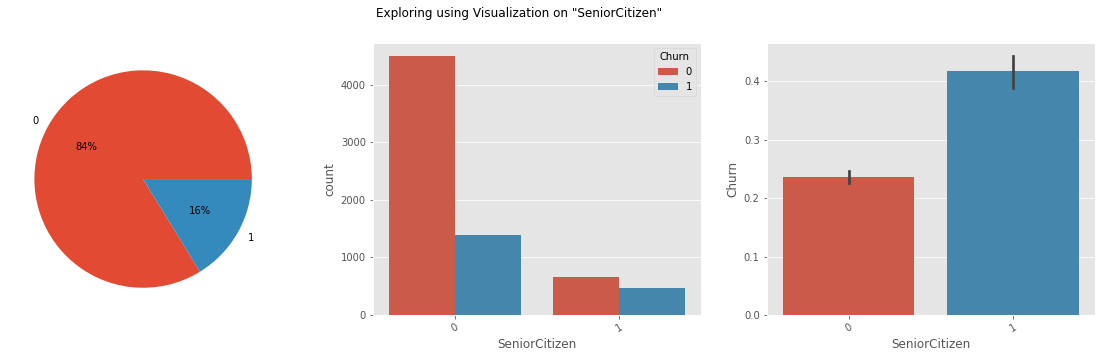

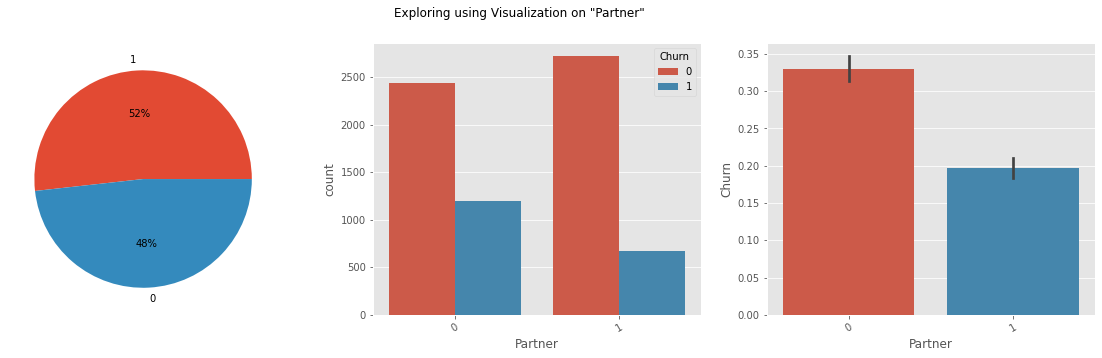

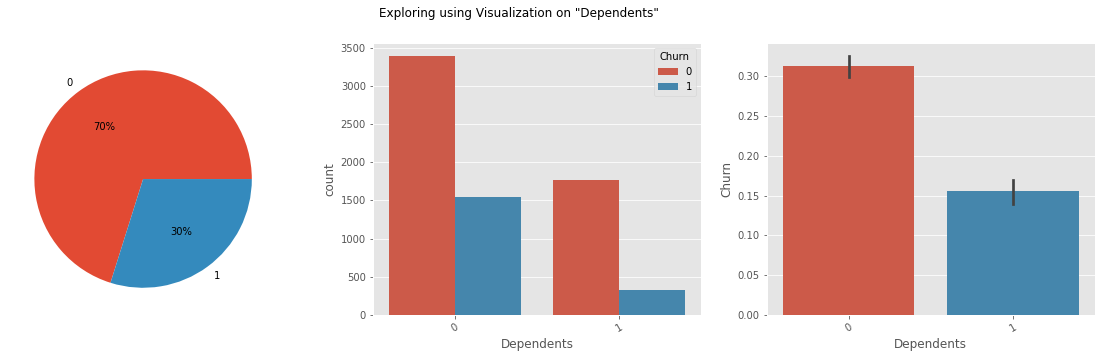

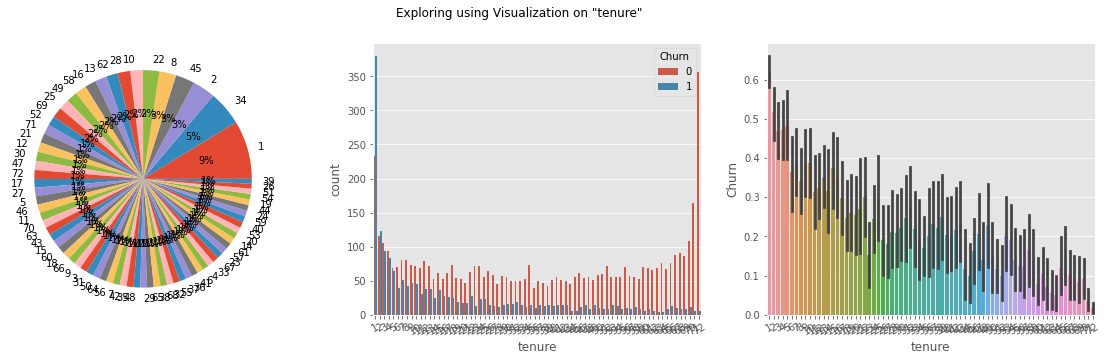

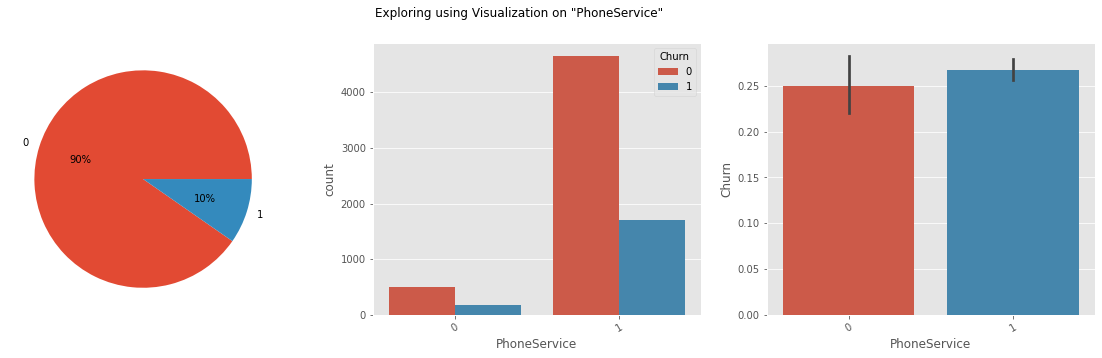

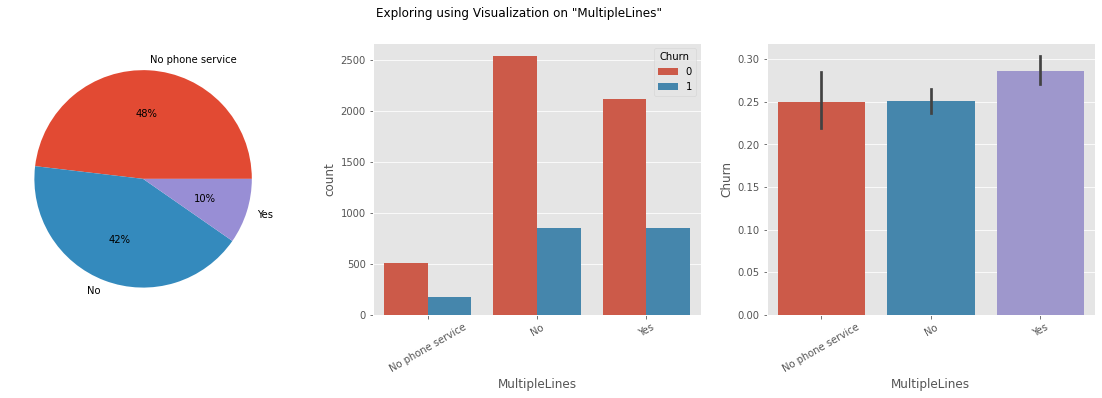

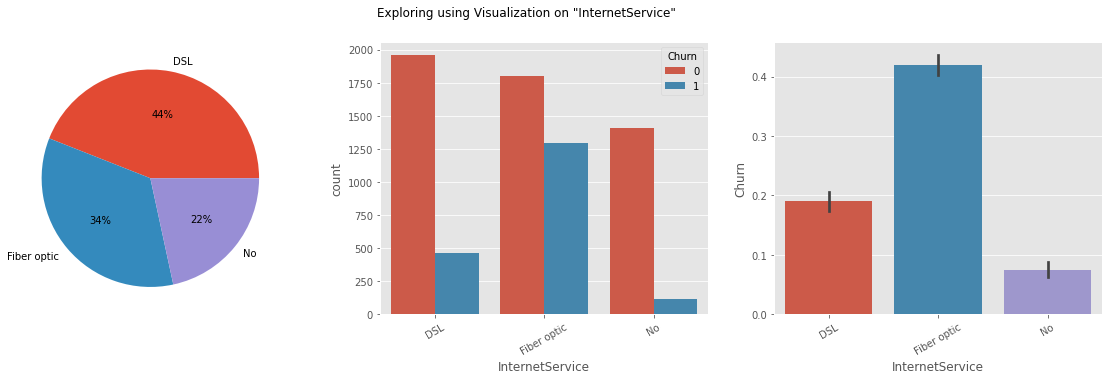

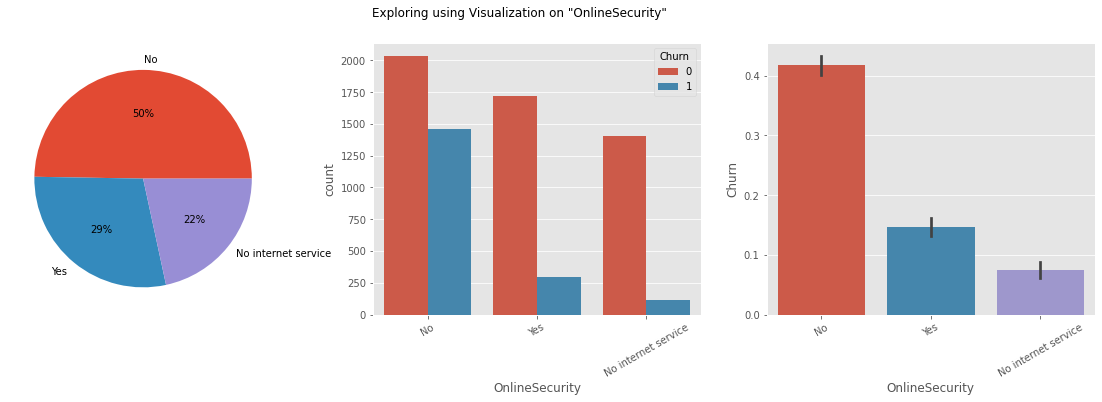

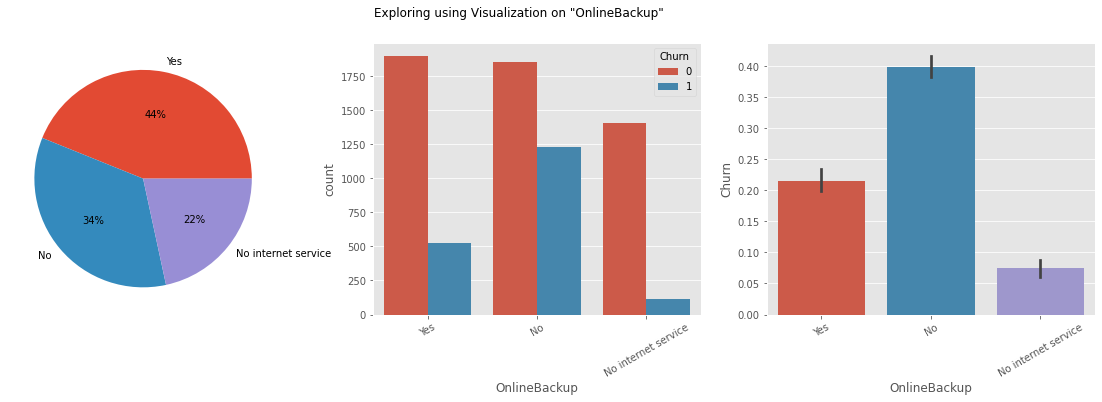

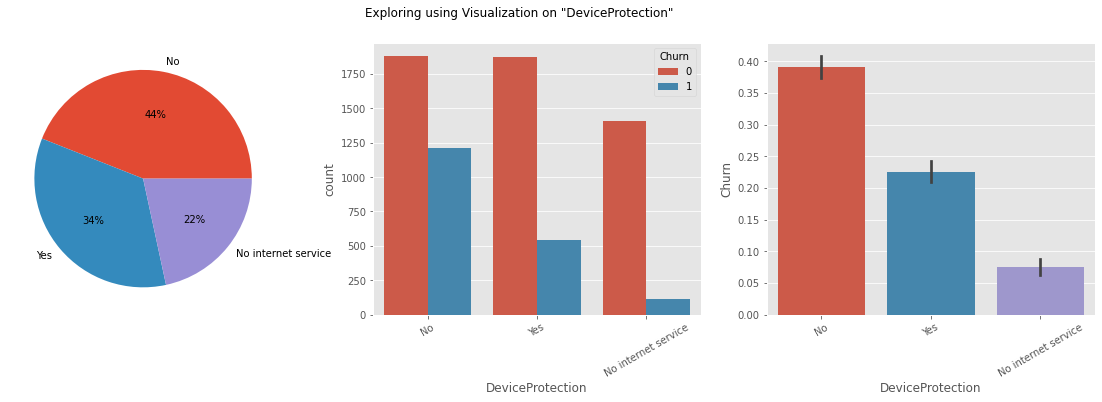

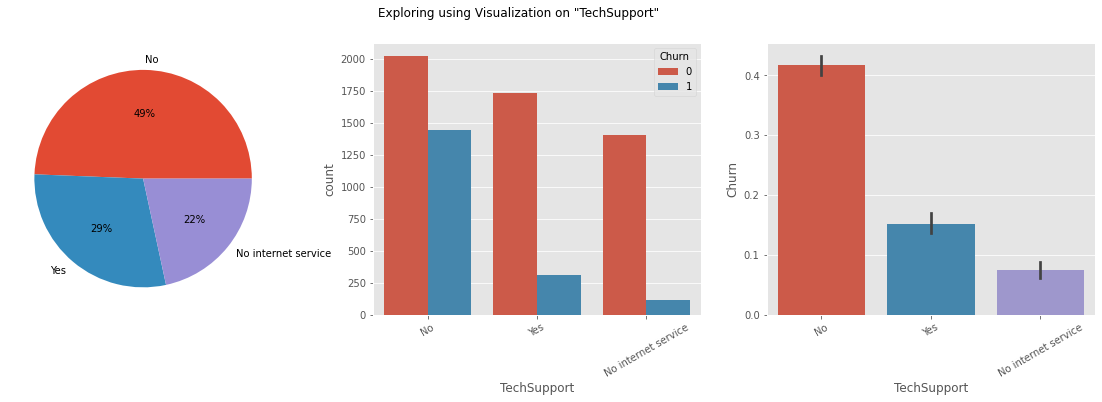

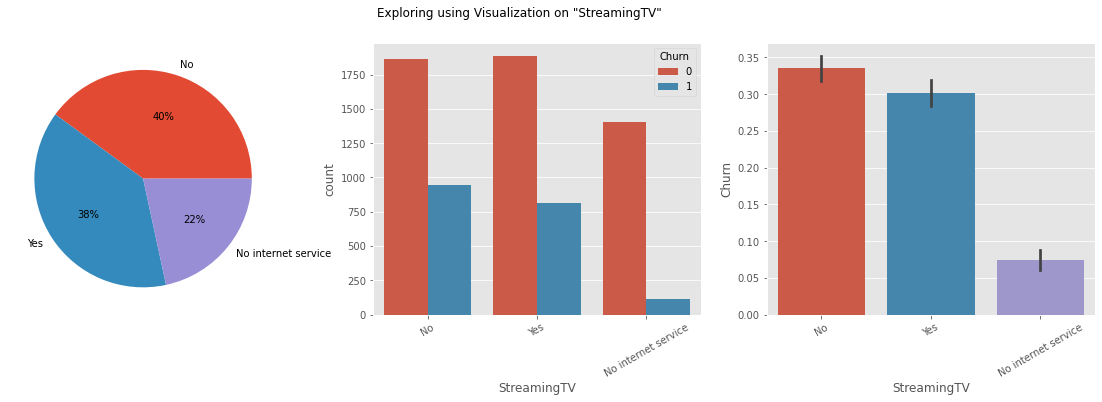

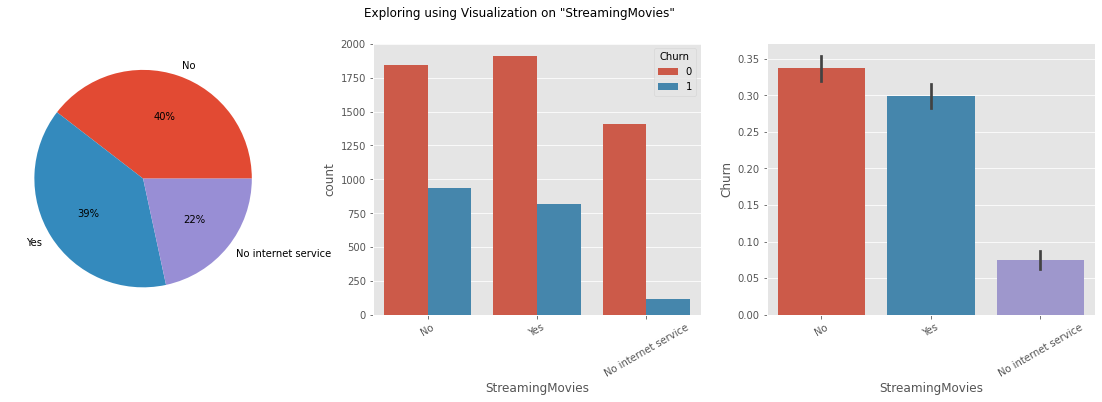

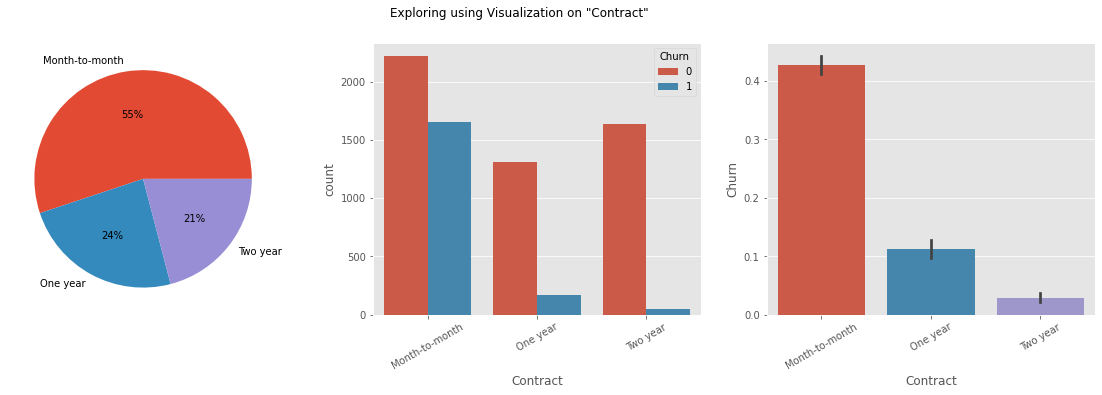

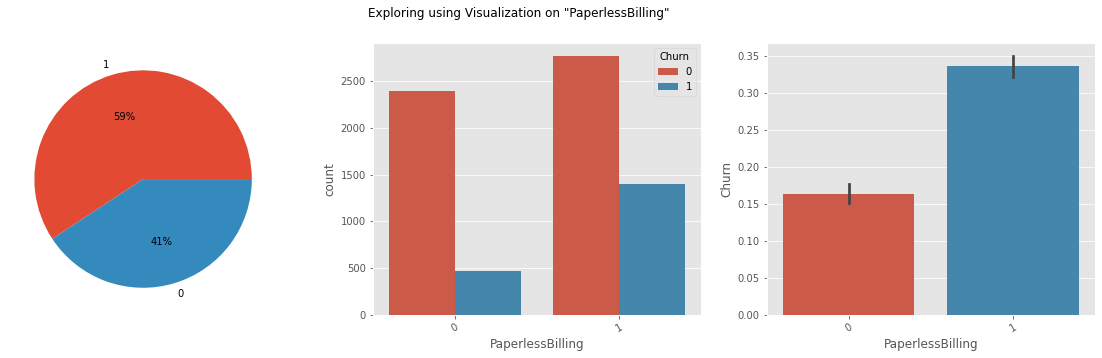

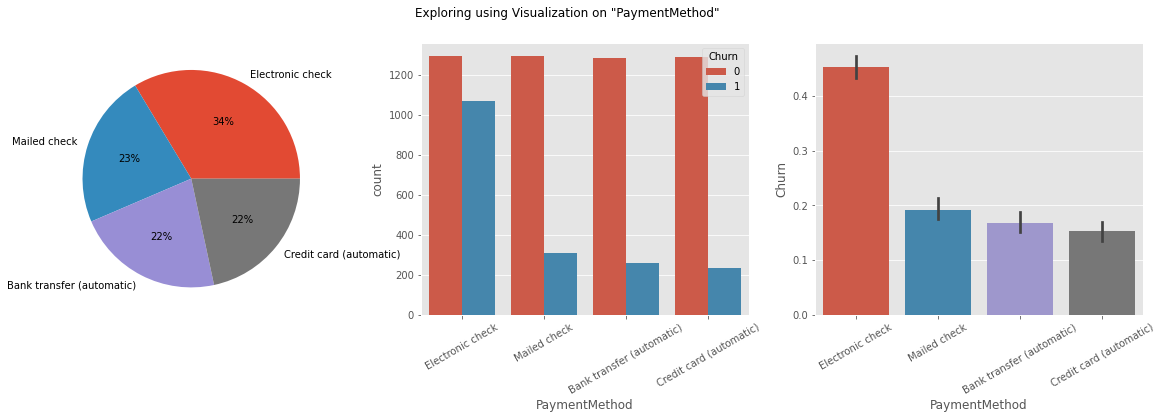

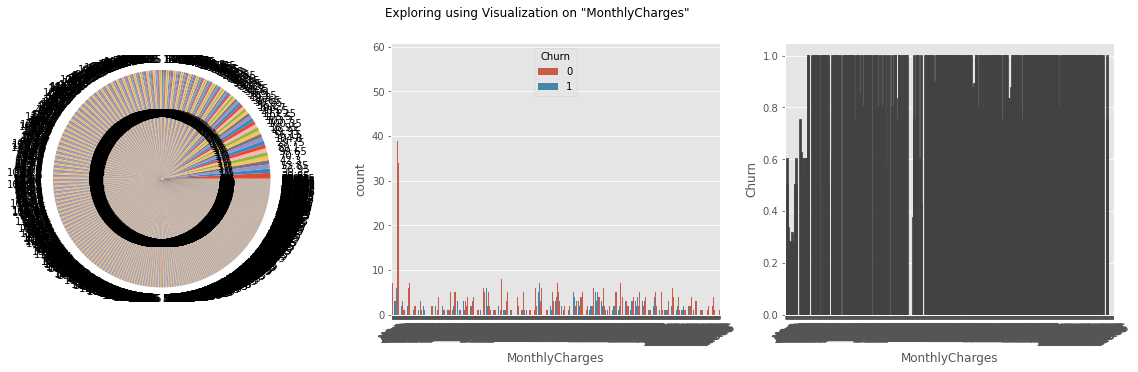

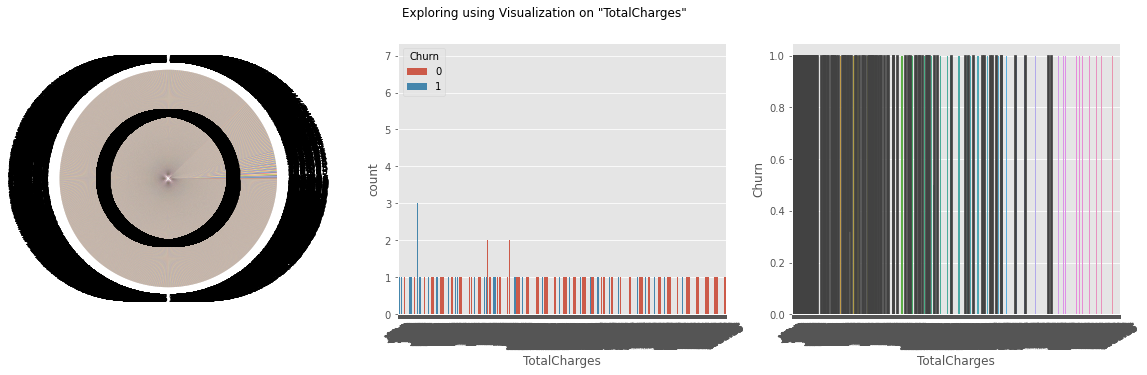

In [ ]:
for columns in df.drop(["Churn","tenure","MonthlyCharges","TotalCharges"]):
  data_visual_column(columns)

# **Visualizing Numerical Variables** 

In [ ]:
sns.kdeplot(df.loc[(df['Churn']==0),'MonthlyCharges'],color="Blue", shade= True,label=" No Churn")

sns.kdeplot(df.loc[(df['Churn']==1),'MonthlyCharges'],color="Red", shade= True,label=" No Churn")

plt.set_ylabel('Density')
plt.set_xlabel('Monthly Charges')
plt.set_title('Monthly charges by churn')

ValueError: ignored

In [ ]:
sns.kdeplot(df['MonthlyCharges'], hue="Churn",legend="Churn")

In [ ]:
sns.kdeplot(df.loc[(df['Churn']==0),'TotalCharges'],color="Blue", shade= True,label=" No Churn")

sns.kdeplot(df.loc[(df['Churn']==1),'TotalCharges'],color="Red", shade= True,label=" No Churn")

plt.set_ylabel('Density')
plt.set_xlabel('Total Charges')
plt.set_title('Total charges by churn')

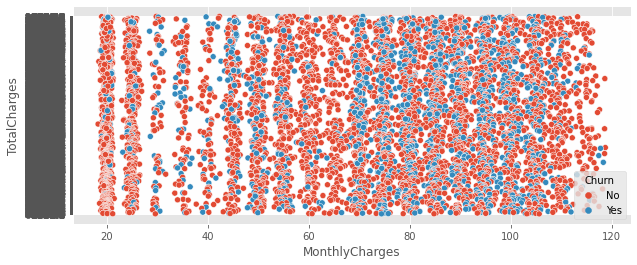

In [ ]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn')

#This implies a positive correlation between the monthly charges, and total charges.
#The churn rate increases with the increase in monthly charges.

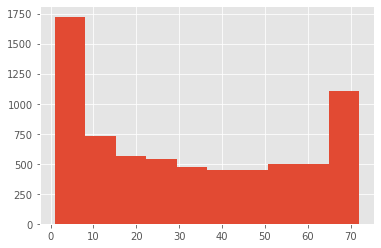

In [ ]:
# distribution of tenure.

plt.hist(data = df, x = 'tenure');

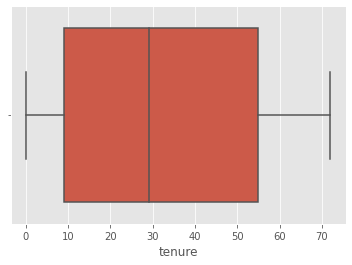

In [ ]:
sns.boxplot(df["tenure"])

In [ ]:
condition = [((df.tenure >= 0)&(df.tenure <= 12)), ((df.tenure > 12)&(df.tenure <= 24)), 
             ((df.tenure > 24)&(df.tenure <= 36)),((df.tenure > 36)&(df.tenure <= 48)),
             ((df.tenure > 48)&(df.tenure <= 60)), (df.tenure > 60)]

#choice = ['0-1year','1-2years', '2-3years', '3-4years','4-5years','more than 5 years']
choice = [0,1, 2, 3, 4, 5]
df['tenure_range'] = np.select(condition, choice)

In [ ]:
sns.countplot(x= 'tenure_range', hue='Churn', data= df, palette='crest', order=choice)
plt.tight_layout()

In [ ]:
df.drop(df["tenure"],axis=1,inplace=True)

# **Outliers Detection**

In [ ]:
num_data=['tenure','MonthlyCharges','TotalCharges']

for i in enumerate(num_data):
  sns.boxplot(data=num_data,x=i[1])

In [ ]:
from numpy import percentile

def Outliers(test):
    q25, q75 = percentile(test, 25), percentile(test, 75)
    iqr = q75 - q25
    print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers
    outliers = [x for x in test if x < lower or x > upper]
    print('Identified outliers: %d' % len(outliers))
    # remove outliers
    outliers_removed = [x for x in test if x >= lower and x <= upper]
    print('Non-outlier observations: %d' % len(outliers_removed))

In [ ]:
for i in list(num_data):
    Outliers(num_data[i])

**INFERENCE:**
Looks like there are no outliers 

# **Encoding the Variables** 

In [ ]:
df.nunique()

In [ ]:
#List of variables to map

varlist =  ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [ ]:
# List of variables to map

varlist =  ['gender']

# Defining the map function
def binary_map(x):
    return x.map({'Female': 1, "Male": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)



In [ ]:
df.replace(['No internet service','No phone service'], 0, inplace=True)

In [ ]:
df = pd.get_dummies(df ,columns=['Contract' ,'OnlineSecurity' ,'TechSupport' ] ,drop_first=True )

In [ ]:
df.head()

In [ ]:

sns.heatmap(df.corr(),annot=True,cmap="BlGr")

# **Splitting the Data** 

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['Churn'], axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# **Scaling the Data** 

In [ ]:
#We will not scale the numerical variables which have values '0' and '1'

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])

X_train.head()

# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)



In [ ]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': log_reg.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False).plot.bar()

In [ ]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(log_reg, X_train, y_train, cv=10, scoring="f1")

print("cross validation is ",np.mean(score))



In [ ]:
log_reg.score(X_train,y_train)

In [ ]:
log_pred= log_reg.predict(X_test)
log_pred

In [ ]:
from sklearn.metrics import accuracy_score

acc_logistic = accuracy_score(y_test,log_pred)
acc_logistic

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
cm = confusion_matrix(log_pred,y_test)
cm

In [ ]:
sns.heatmap(cm, annot=True, fmt='g', ax=ax)

In [ ]:
print(classification_report(y_test, log_pred)

In [ ]:
#plt.bar(x=importances['Attribute'], height=importances['Importance'])

#plt.title('Feature importances obtained from coefficients', size=20)
#plt.xticks(rotation='vertical')
#plt.show()

# **SVM Model**

In [ ]:
from sklearn.svm import SVC
supp = svm.SVC()

supp.fit(X_train,y_train)

svm_pred = supp.predict(X_test)
svm_pred

acc_svm = accuracy_score(y_test,svm_pred)
acc_svm

In [ ]:
cm = confusion_matrix(svm_pred, y_test)
cm

In [ ]:
sns.heatmap(cm, annot=True, fmt='g', ax=ax)

# **XGBoost Model** 

In [ ]:
import xgboost as xgb